In [1]:
# Setup
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

np.random.seed(0) # For reproducibility

In [2]:
# Q2 Larger than two standard deviations
n_samples = 10_000_000
X = np.random.normal(loc=0, scale=1, size=n_samples)
p_est = np.mean(X > 2)
p_exact = 1 - norm.cdf(2)

print(f"Estimated P(X > 2): {p_est}")
print(f"Exact P(X > 2): {p_exact}")

Estimated P(X > 2): 0.0226899
Exact P(X > 2): 0.02275013194817921


C:\Users\ningc\AppData\Local\Temp\ipykernel_22204\300325709.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='r')


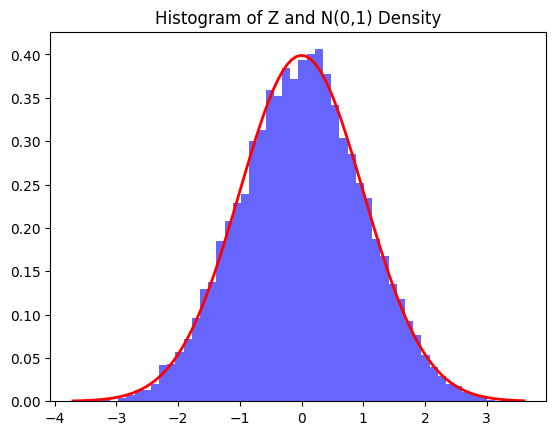

In [3]:
# Q5 Simulating an Approximate Gaussian Distribution

# 1. The expectation of Z is 0 and the variance is sqrt(6)

# 2. Simulate the distribution of Z
n_samples = 10_000

X = np.random.uniform(-1, 1, (n_samples, 6)) * np.sqrt(3)
Z = np.sum(X, axis=1) / np.sqrt(6)

# Plot the histogram of samples
plt.hist(Z, bins=50, density=True, alpha=0.6, color='b')

# Superimpose the density of N(0, 6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2, color='r')
plt.title("Histogram of Z and N(0,1) Density")
plt.show()



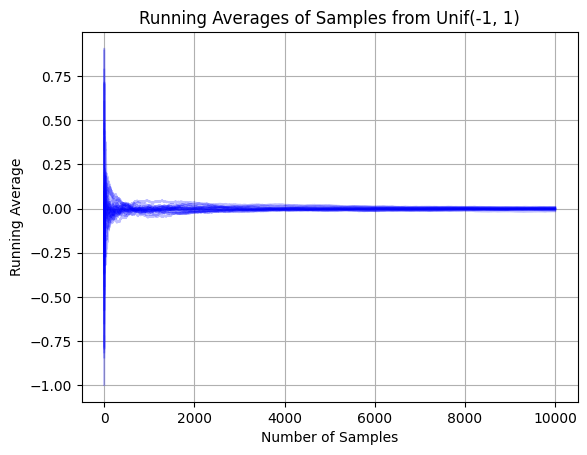

In [4]:
# Q6 Running average and LLN

n_samples = 20
m_samples = 10_000

# Sample from Unif(-1, 1)
X = np.random.uniform(-1, 1, (n_samples, m_samples))

# Compute running averages
running_averages = np.cumsum(X, axis=1) / np.arange(1, m_samples + 1)

# Plot the running averages
for i in range(n_samples):
    plt.plot(running_averages[i, :], color='blue', alpha=0.25)

plt.title("Running Averages of Samples from Unif(-1, 1)")
plt.xlabel("Number of Samples")
plt.ylabel("Running Average")

plt.grid()
plt.show()

C:\Users\ningc\AppData\Local\Temp\ipykernel_22204\1095716557.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='r')


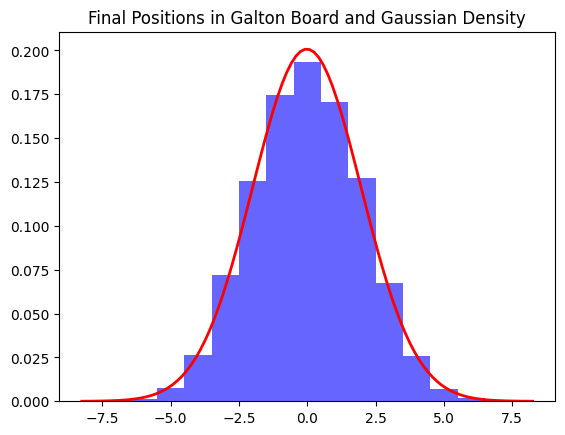

In [5]:
# Q8 Galton Board

n_rows = 16
n_balls = 10_000

# Simulate the Galton board
final_positions = np.zeros(n_balls)
for i in range(n_balls):
    position = 0
    for j in range(n_rows):
        step = np.random.choice([-1, 1])  # Left or right
        position += step
    final_positions[i] = position / 2

# Plot the histogram of final positions
plt.hist(final_positions, bins=np.arange(-n_rows / 2 + 0.5, n_rows / 2 + 0.5, 1), density=True, alpha=0.6, color='b')

# Plot the Gaussian Distribution with the same mean and variance as the empirical distribution
mean = np.mean(final_positions)
std_dev = np.std(final_positions)
xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)

plt.plot(x, p, 'k', linewidth=2, color='r')
plt.title("Final Positions in Galton Board and Gaussian Density")
plt.show()


In [6]:
# Q11 Detecting Non-randomness
THRESHOLD = 0.01

def frequency_test(s : str, alpha : float = THRESHOLD) -> bool:
    s_np = np.array([int(bit) for bit in s])
    s_np = 2 * s_np - 1
    
    s_n = np.sum(s_np)
    s_obs = abs(s_n) / np.sqrt(len(s))
    p_value = 2 * (1 - norm.cdf(s_obs))
    return p_value >= alpha

def frequency_block_test(s: str, m: int, alpha: float = THRESHOLD) -> bool:
    N = len(s) // m

    # proportion of ones in each block
    pi = []
    for i in range(N):
        block = s[i*m:(i+1)*m]
        pi_i = block.count('1') / m
        pi.append(pi_i)
    pi = np.array(pi)
    
    chi_squared = 4 * m * np.sum((pi - 0.5) ** 2)
    # incomplete gamma function for p-value
    p_value = 1 - norm.cdf(np.sqrt(chi_squared))
    return p_value >= alpha

def runs_test(s: str, alpha: float = THRESHOLD) -> bool:
    n = len(s)
    s_np = np.array([int(bit) for bit in s])
    
    pi = np.sum(s_np) / n
    if abs(pi - 0.5) >= (2 / np.sqrt(n)):
        return False
    
    V_n_obs = 1
    for i in range(1, n):
        if s_np[i] != s_np[i-1]:
            V_n_obs += 1
    
    expected_value = 2 * n * pi * (1 - pi)
    variance = 2 * n * (4 * pi * (1 - pi) ** 2)
    
    z = abs(V_n_obs - expected_value) / np.sqrt(variance)
    p_value = 2 * (1 - norm.cdf(z))
    return p_value >= alpha

In [7]:
test_strings = [
    '110010010000111111011010101000100010000101101000111111110000',
    '0110011001010001111010110101010001000100001011010001111110000',
    '1010101010101010101010101010101010101010101010101010101010101010',
]

for i, s in enumerate(test_strings):
    print(f"Test String {i+1}:")
    print(f"  Frequency Test: {'Pass' if frequency_test(s) else 'Fail'}")
    print(f"  Frequency Block Test (m=8): {'Pass' if frequency_block_test(s, m=8) else 'Fail'}")
    print(f"  Runs Test: {'Pass' if runs_test(s) else 'Fail'}")
    

Test String 1:
  Frequency Test: Pass
  Frequency Block Test (m=8): Fail
  Runs Test: Pass
Test String 2:
  Frequency Test: Pass
  Frequency Block Test (m=8): Fail
  Runs Test: Pass
Test String 3:
  Frequency Test: Pass
  Frequency Block Test (m=8): Pass
  Runs Test: Fail
